# Plots for SVM hyperplanes

### Content

+ [1. Notebook description](#1.-Notebook-Description)
+ [2. Margins and Hyperplanes](#2.-Margins-and-Hyperplanes)
+ [3. Seperability and Kernel Functions](#3.-Seperability-and-Kernel-Function)

---

# 1. Notebook Description

This notebook was used to create 3D plots to explain SVM margins and the impact of the kernel trick for my thesis.
The margins are only pseudo-solutions for the sake of plotting!
In fact, all data generated here completely artificial.

---

**Imports:**

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Some helper functions**:

In [32]:
def ClosestPointOnLine(a, b, p):
    ap = p-a
    ab = b-a
    result = a + np.dot(ap,ab)/np.dot(ab,ab) * ab
    return result

def pseudo_lda(samples, a, b):
    psamples = samples.copy()
    for ix, sample in enumerate(psamples):
        psamples[ix] = ClosestPointOnLine(a, b, sample)
    a = psamples[n:,:].mean(axis=0)
    b = psamples[:n,:].mean(axis=0)
    m = (a+b)/2
    return psamples, m, a, b

def plot_projection(psamples, a, b):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(xs=psamples[:n,0],
               ys=psamples[:n, 1],
               zs=psamples[:n, 2],
               c='r', marker='o', alpha=0.1)
    ax.scatter(xs=psamples[n:,0],
               ys=psamples[n:, 1],
               zs=psamples[n:, 2],
               c='b', marker='o', alpha=0.1)

    ax.set_xlim([-10,10])
    ax.set_ylim([-10,10])
    ax.set_zlim([-10,10])
    ticks = [10,5,0,-5,-10]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_zticks(ticks)
    #ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5, colors=['#002070'], alpha=0.3)
    #ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5, colors=['#002070'], alpha=0.2)
    #ax.view_init(45, 45)
    ax.plot(*zip(a,b), c='black', marker='o')
    
def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

def randrangemin(n, vmin, vmax, xmin):
    r = np.zeros(n)
    for i in np.arange(n):
        rs = np.sign(np.random.rand()-0.5)
        r[i] = rs*(np.abs(vmin) + np.abs(vmax)*np.random.rand())
    return r

# 2. Margins and Hyperplanes

First, we generate some samples

In [34]:
n = 100

# class 1
f1 = randrange(n-1, -10, -9.5)
f2 = randrange(n-1, -10, 6)
f3 = randrange(n-1, -10, 10)
samples = np.array([f1, f2, f3]).T
samples = np.append(samples, [[-1, -2, 0]], axis=0)

# class 2
f1 = randrange(n, 9.5, 10)
f2 = randrange(n, -6, 10) 
f3 = randrange(n, -10, 10)
samples = np.concatenate([samples, np.array([f1, f2, f3]).T])
samples = np.append(samples, [[1, 4, 0]], axis=0)


# plane
r1 = np.linspace(-10,10,100)
#X = np.zeros((100,100)) + m[0]
Y, Z = np.meshgrid(r,r)
Zs = 1*Z
m = 7.2
b = 3
X = np.outer(np.zeros(100)+1,  np.linspace(m,-m,100))
X2 = np.outer(np.zeros(100)+1, np.linspace(m,-m,100)+b)
X3 = np.outer(np.zeros(100)+1, np.linspace(m,-m,100)-b)

And then plot with `scatter()`.

<function matplotlib.pyplot.show>

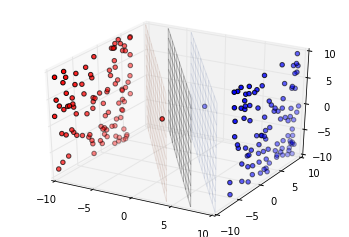

In [35]:
stride = 10
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=samples[:n,0],
           ys=samples[:n, 1],
           zs=samples[:n, 2],
           c='r', marker='o')
ax.scatter(xs=samples[n:,0],
           ys=samples[n:, 1],
           zs=samples[n:, 2],
           c='b', marker='o')

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])
ticks = [10,5,0,-5,-10]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
ax.plot_wireframe(X3, Y, Zs, rstride=stride, cstride=stride, colors=['#702000'], alpha=0.1)
ax.plot_wireframe(X, Y, Z, rstride=stride, cstride=stride, colors=['#202020'], alpha=0.3)
ax.plot_wireframe(X2, Y, Zs, rstride=stride, cstride=stride, colors=['#002070'], alpha=0.1)
plt.show

# 3. Seperability and Kernel Function

In [36]:
n = 800
alpha = randrange(n, 0, 2*np.pi)
phi = randrange(n, 0, 2*np.pi)
f1 = randrange(n, 0, 3)*np.cos(phi)*np.cos(alpha)
f2 = randrange(n, 0, 3)*np.cos(phi)*np.sin(alpha)
f3 = randrange(n, 0, 3)*np.sin(phi)
samples = np.array([f1, f2, f3]).T

alpha = randrange(n, 0, 2*np.pi)
phi = randrange(n, 0, 2*np.pi)
f1 = 11*np.cos(phi)*np.cos(alpha)
f2 = 11*np.cos(phi)*np.sin(alpha)
f3 = 11*np.sin(phi)
samples = np.concatenate([samples, np.array([f1, f2, f3]).T])

# plane
r = np.linspace(-10,10,100)
Y, Z = np.meshgrid(r,r)

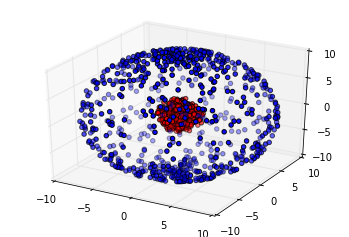

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=samples[:n,0],
           ys=samples[:n, 1],
           zs=samples[:n, 2],
           c='r', marker='o')
ax.scatter(xs=samples[n:,0],
           ys=samples[n:, 1],
           zs=samples[n:, 2],
           c='b', marker='o')

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])
ticks = [10,5,0,-5,-10]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
plt.show()

---
Let's do it again for 2-D, so we can apply a kernel function afterwards:

In [38]:
n=500
phi = randrange(n, 0, 2*np.pi)
f1 = randrange(n, 0, 2)*np.cos(phi)
f2 = randrange(n, 0, 2)*np.sin(phi)
samples = np.array([f1, f2]).T
phi = randrange(n, 0, 2*np.pi)
f1 = randrange(n, 5, 8)*np.cos(phi)
f2 = randrange(n, 5, 8)*np.sin(phi)
samples = np.concatenate([samples, np.array([f1, f2]).T])

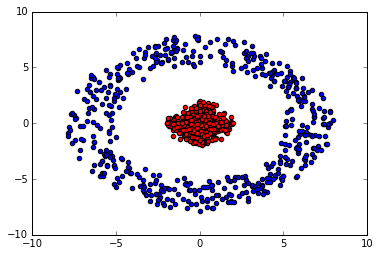

In [45]:
_ = plt.scatter(x=samples[:n,0],
            y=samples[:n,1],
            c='r', marker='o')
_ = plt.scatter(x=samples[n:,0],
            y=samples[n:,1],
            c='b', marker='o')

---
Now we can transform the 2d samples into an arbitrary new space using the function `phi()`.

In [40]:
def phi(x):
    return np.array([x[0]**2, x[1]**2,  np.sqrt(2)*x[0]*x[1]])

In [41]:
phisamples = np.apply_along_axis(phi, 1, samples)

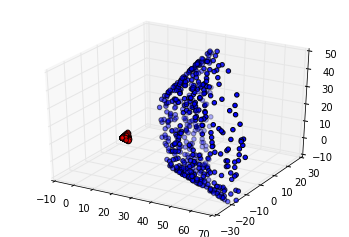

In [43]:
stride = 10
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=phisamples[:n,0],
           ys=phisamples[:n, 1],
           zs=phisamples[:n, 2],
           c='r', marker='o')
ax.scatter(xs=phisamples[n:,0],
           ys=phisamples[n:, 1],
           zs=phisamples[n:, 2],
           c='b', marker='o')

ax.set_ylim([-30,30])
ax.set_zlim([-10,50])
_ = plt.show